## Load the dataset
___

In [1]:
from tabulate import tabulate
import pandas as pd

file_path = '/Users/pranavkhot/Documents/STOCKS/data/Ford_Preprocessed.csv'
ford_data = pd.read_csv(file_path)

## Preparing the Data
___

In [2]:
import numpy as np

sequence_length = 60
X, y = [], []

for i in range(sequence_length, len(ford_data)):
    X.append(ford_data['Close'][i-sequence_length:i]) # Sequence of 60 days
    y.append(ford_data['Close'][i]) # The next day

X, y = np.array(X), np.array(y)

# Reshape X to fit the LSTM model
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and validation sets
train_size = int(len(X) * 0.8)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]


## Creating the LSTM Model
---

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()

# Add LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add output layer
model.add(Dense(units=1)) # Prediction of the next closing value


## Compiling the Model
___

In [4]:
model.compile(optimizer='adam', loss='mean_squared_error')

## Training the Model
___

In [6]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
30/30 [==============================] - 1s 28ms/step - loss: 8.0014e-04 - val_loss: 2.7341e-04
Epoch 2/100
30/30 [==============================] - 1s 27ms/step - loss: 8.8043e-04 - val_loss: 3.1944e-04
Epoch 3/100
30/30 [==============================] - 1s 27ms/step - loss: 7.8388e-04 - val_loss: 3.0273e-04
Epoch 4/100
30/30 [==============================] - 1s 27ms/step - loss: 7.9557e-04 - val_loss: 3.0959e-04
Epoch 5/100
30/30 [==============================] - 1s 27ms/step - loss: 7.5349e-04 - val_loss: 3.0994e-04
Epoch 6/100
30/30 [==============================] - 1s 27ms/step - loss: 7.4642e-04 - val_loss: 2.6195e-04
Epoch 7/100
30/30 [==============================] - 1s 27ms/step - loss: 9.3002e-04 - val_loss: 2.6395e-04
Epoch 8/100
30/30 [==============================] - 1s 27ms/step - loss: 8.7649e-04 - val_loss: 3.5491e-04
Epoch 9/100
30/30 [==============================] - 1s 27ms/step - loss: 8.2465e-04 - val_loss: 2.6333e-04
Epoch 10/100
30/30 [========

## Evaluating the Model
___

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the validation set
predicted_stock_price = model.predict(X_val)

# Calculate MAE
mae = mean_absolute_error(y_val, predicted_stock_price)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_val, predicted_stock_price)
print(f"Mean Squared Error (MSE): {mse}")


8/8 [==============================] - 0s 6ms/step
Mean Absolute Error (MAE): 0.010289344560587676
Mean Squared Error (MSE): 0.00019132287649069438


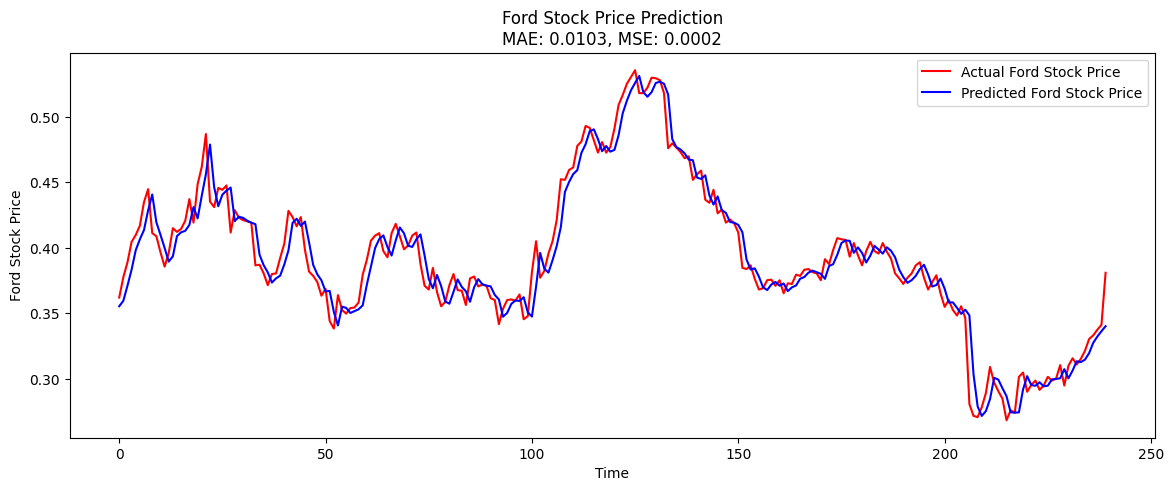

In [9]:
import matplotlib.pyplot as plt
# Plotting the actual vs predicted stock prices
plt.figure(figsize=(14, 5))
plt.plot(y_val, color='red', label='Actual Ford Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Ford Stock Price')
plt.title(f'Ford Stock Price Prediction\nMAE: {mae:.4f}, MSE: {mse:.4f}')
plt.xlabel('Time')
plt.ylabel('Ford Stock Price')
plt.legend()
plt.show()


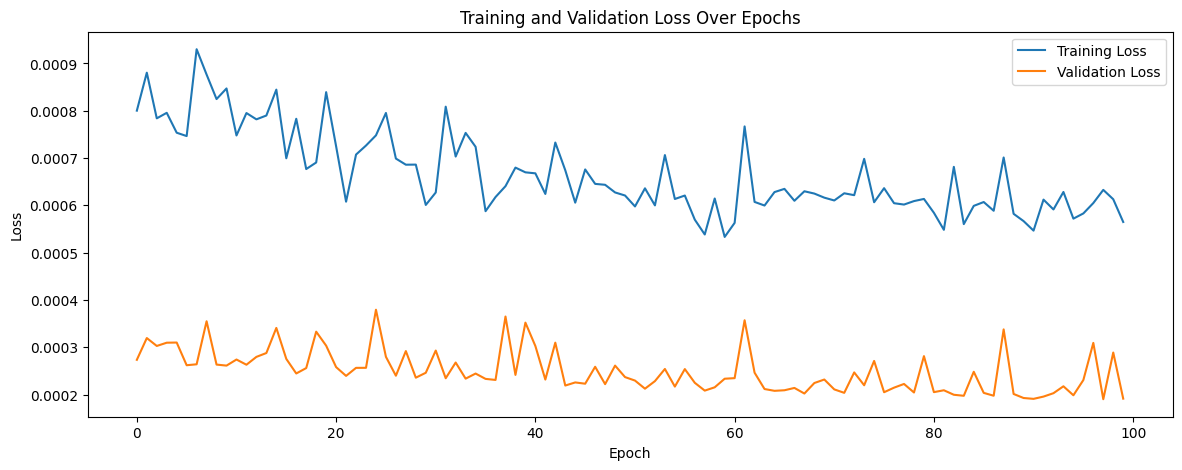

In [10]:
# Plotting training and validation loss over epochs
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Final capital: $10059.66
Total return: $59.66
Annualized return: 34.96%


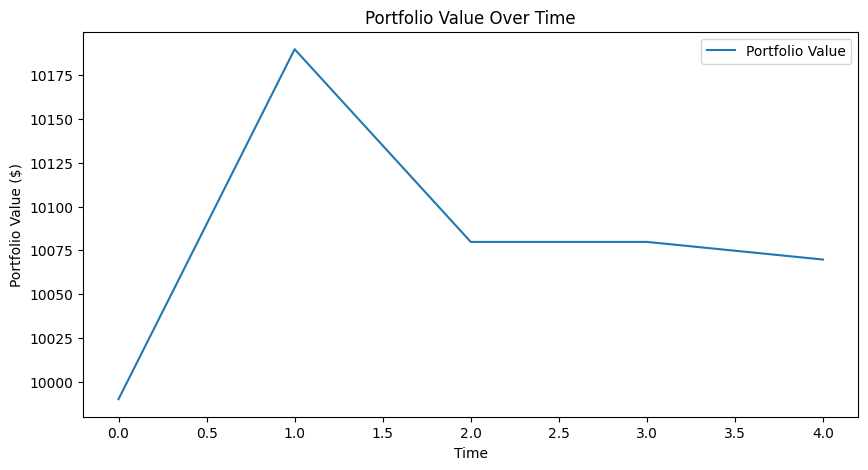

In [11]:
import numpy as np

# Sample data (replace these with your actual data)
y_val = np.array([1.00, 1.02, 1.01, 0.99, 1.04])  # Actual prices
predicted_stock_price = np.array([1.01, 1.02, 1.00, 0.98, 1.05])  # Predicted prices

# Initial capital and position
capital = 10000
position = 0
transaction_cost = 0.001

# Lists to hold the value of the portfolio over time
portfolio_value = []

# Backtesting logic
for actual, predicted in zip(y_val, predicted_stock_price.flatten()):
    # The model predicts the price will go up
    if predicted > actual and capital > 0:
        # Buy as much as you can
        position = capital / actual
        capital = 0
        position *= (1 - transaction_cost)
    # The model predicts the price will go down
    elif predicted < actual and position > 0:
        # Sell your position
        capital = position * actual
        position = 0
        capital *= (1 - transaction_cost)
    
    # Append the current value of the portfolio
    portfolio_value.append(capital + (position * actual))

# Finalize the backtesting by selling any remaining positions
if position > 0:
    capital += position * y_val[-1] * (1 - transaction_cost)
    position = 0

# Calculate total and annualized returns
total_return = capital - 10000
annualized_return = ((capital / 10000) ** (252 / len(y_val))) - 1

print(f"Final capital: ${capital:.2f}")
print(f"Total return: ${total_return:.2f}")
print(f"Annualized return: {annualized_return:.2%}")

# Plot the portfolio value over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()
